<a href="https://colab.research.google.com/github/fatimaabuhamdeh/AI/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [40]:
df['Date']= pd.to_datetime(df['Date'])

# extract year from date column
df["Year"] = df["Date"].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002


<ipython-input-41-d06f20434936>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



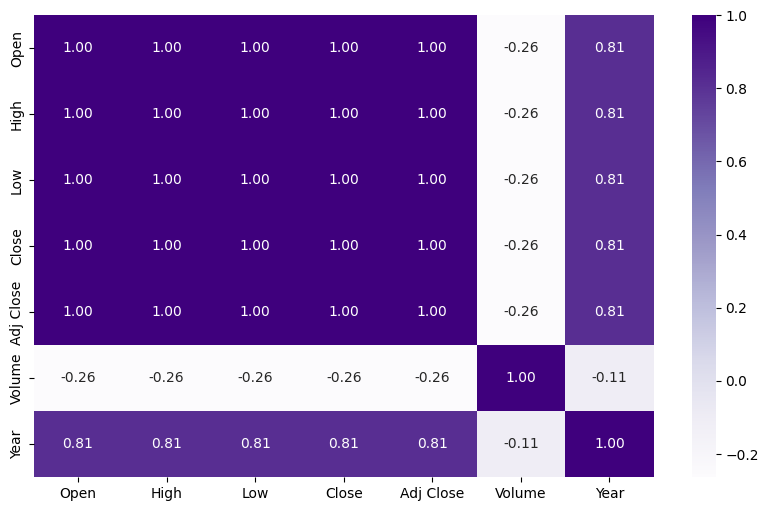

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), fmt=".2f", annot = True, cmap = "Purples")
plt.show()

In [43]:
fig = px.line(df, x="Date", y=["High","Low"],title="Stocks High and Low Values Over Time")
fig.show()

In [44]:
fig = px.line(df, x="Date", y=["High","Low"], range_x=['2012-01-01','2022-06-17'])
fig.show()

In [46]:
fig = px.line(df, x="Date", y=["High","Low"], range_x=['2017-01-01','2022-06-17'])
fig.show()

In [48]:
fig = px.area(df, x="Date", y=["Open","Close"],title="Open and Close Stocks Over Time")
fig.show()

In [50]:
list1=["Open","High","Low","Close"]
list2=["High", "Low"]
list3=["Open","Close"]
list4=[list1, list2, list3]


for i in range(len(list4)):
    fig = px.line(df, x="Date", y=list4[i], title="Stocks Distribution over Different Time Window")

    # Update the x-axis settings to include a range slider
    # This allows users to zoom in on specific date ranges
    fig.update_xaxes(
    rangeslider_visible=True,

    # Configure a rangeselector with buttons for different time intervals
    rangeselector=dict(
    buttons=list([
    dict(count=1, label="1m", step="month", stepmode="todate"),
    dict(count=6, label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="Y", step="year", stepmode="backward"),
    dict(count=5, label="5y", step="year", stepmode="backward"),
    dict(count=10, label="10y", step="year", stepmode="backward"),
    dict(step="all")
    ])
    )
    )

  # Display the figure
    fig.show()